# A2C Final Results

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../")
from SC_Utils.inspection_plots_v2 import plot_logging

In [2]:
parent_dir = "../Results"

In [62]:
def plot_n_runs(
    logs, 
    best_idx, 
    map_name, 
    asymptotic_return, 
    asymptotic_mean_err,
    moving_average=False, 
    average_window=100, 
    alpha=0.3
):
    n_runs = logs.shape[0]
    steps = logs[:,:,0]
    returns = logs[:,:,1]
    plt.figure(figsize=(8,6))
    for n in range(n_runs):
        if moving_average:
            n_epochs = steps[n][average_window:]
        else:
            n_epochs = steps[n]

        if moving_average:
            score = np.array([np.mean(returns[n][i:i+average_window]) for i in range(len(n_epochs))])
        else:
            score = returns[n]

        label = r'$run ~ %d : %.1f \pm %.1f$'%(n+1, asymptotic_return[n],asymptotic_mean_err[n] )
        if n == best_idx:
            plt.plot(n_epochs, score, alpha = 1, label=label)
        else:
            plt.plot(n_epochs, score, alpha = 0.3, label=label)

    plt.legend(fontsize=15)
    plt.title("A2C performance for %s"%map_name, fontsize=18)
    plt.xlabel("Number of steps", fontsize=18)
    plt.ylabel("Total reward per episode", fontsize=18)
    plt.show()

### MoveToBeacon

In [63]:
IDs = ['GWCV','AFBF','GKWT','WTAD','CTSH']
map_name = 'MoveToBeacon'

In [64]:
logs = []
for ID in IDs:
    filename = '%s/%s/Logging/%s.txt'%(parent_dir, map_name, ID)
    logging = np.loadtxt(filename, delimiter=',', skiprows=1)
    logs.append(logging)
logs = np.array(logs)

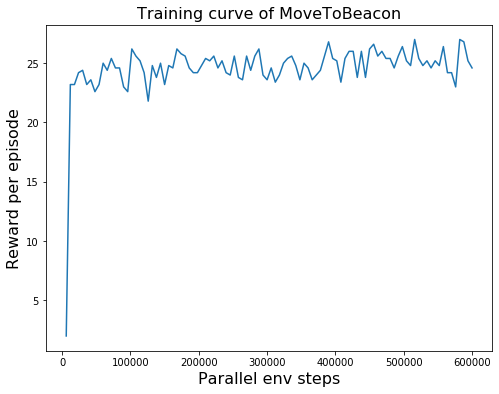

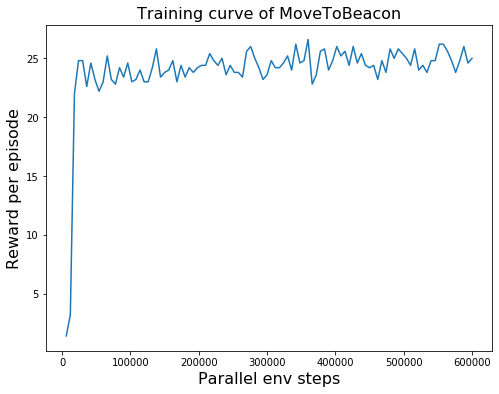

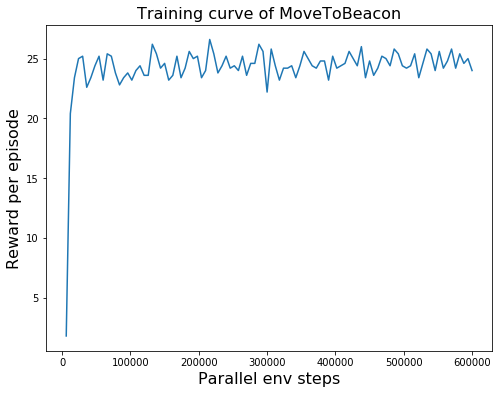

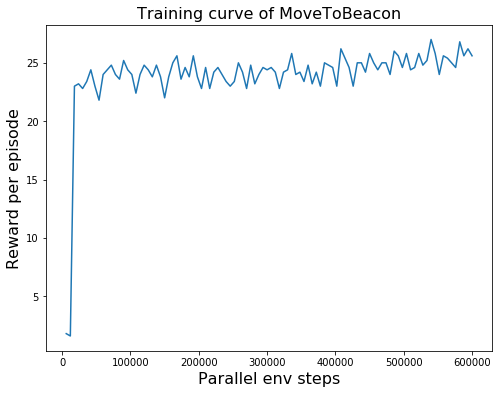

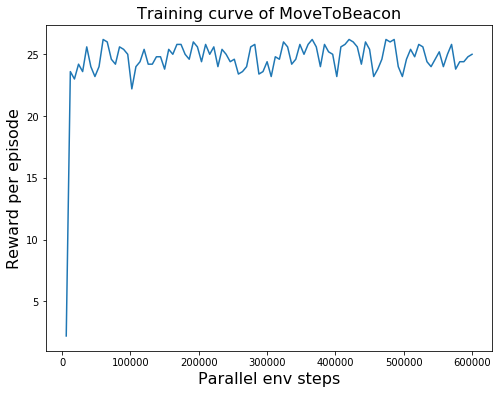

In [65]:
for logging in logs:
    plot_logging(logging, map_name)

In [66]:
asymptotic_return = np.array([logging[-10:,1].mean() for logging in logs])
asymptotic_mean_err = np.array([logging[-10:,1].std()/np.sqrt(10) for logging in logs])

In [67]:
best_idx = np.argmax(asymptotic_return)
best_idx

3

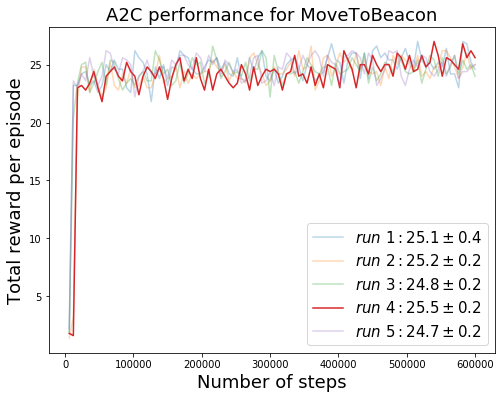

In [68]:
plot_n_runs(logs, best_idx, map_name, asymptotic_return, asymptotic_mean_err)

In [69]:
best_average = asymptotic_return[best_idx]
best_err = asymptotic_mean_err[best_idx]
print("Best run average : %.1f +/- %.1f"%(best_average,best_err))
nruns_average = asymptotic_return.mean()
nruns_err = asymptotic_return.std()
print("5 run average : %.1f +/- %.1f"%(nruns_average,nruns_err))

Best run average : 25.5 +/- 0.2
5 run average : 25.0 +/- 0.3


### CollectMineralShards

In [70]:
IDs = ['UJAO','NCCO','NATR','CGBT','BXIK']
map_name = 'CollectMineralShards'

In [71]:
logs = []
for ID in IDs:
    filename = '%s/%s/Logging/%s.txt'%(parent_dir, map_name, ID)
    logging = np.loadtxt(filename, delimiter=',', skiprows=1)
    logs.append(logging)
logs = np.array(logs)

In [72]:
asymptotic_return = np.array([logging[-10:,1].mean() for logging in logs])
asymptotic_mean_err = np.array([logging[-10:,1].std()/np.sqrt(10) for logging in logs])
print("Asymptotic average return: ", asymptotic_return)
print("Asymptotic average return error: ", asymptotic_mean_err)
best_idx = np.argmax(asymptotic_return)
best_idx

Asymptotic average return:  [106.34  86.5  103.68 104.58 104.4 ]
Asymptotic average return error:  [0.87500857 1.7781451  0.89630352 0.77120685 0.58378078]


0

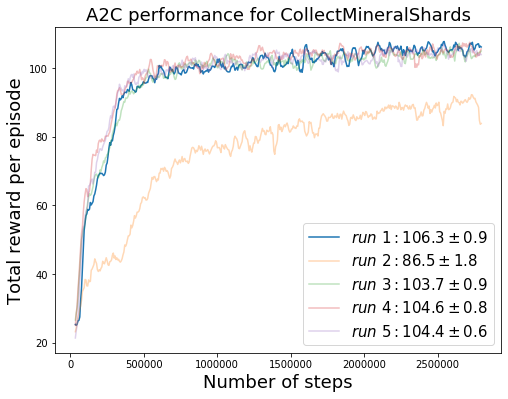

In [73]:
plot_n_runs(logs, best_idx, map_name, asymptotic_return, asymptotic_mean_err, 
            moving_average=True, average_window=5)

In [74]:
best_average = asymptotic_return[best_idx]
best_err = asymptotic_mean_err[best_idx]
print("Best run average : %.1f +/- %.1f"%(best_average,best_err))
nruns_average = asymptotic_return.mean()
nruns_err = asymptotic_return.std()
print("5 run average : %.1f +/- %.1f"%(nruns_average,nruns_err))

Best run average : 106.3 +/- 0.9
5 run average : 101.1 +/- 7.4


### FindAndDefeatZerglings

In [75]:
IDs = ['NAET','WKHT','YELI','ZEBG','DYJS']
map_name = 'FindAndDefeatZerglings'

In [76]:
logs = []
for ID in IDs:
    filename = '%s/%s/Logging/%s.txt'%(parent_dir, map_name, ID)
    logging = np.loadtxt(filename, delimiter=',', skiprows=1)
    logs.append(logging)
logs = np.array(logs)

In [77]:
asymptotic_return = np.array([logging[-10:,1].mean() for logging in logs])
asymptotic_mean_err = np.array([logging[-10:,1].std()/np.sqrt(10) for logging in logs])
print("Asymptotic average return: ", asymptotic_return)
print("Asymptotic average return error: ", asymptotic_mean_err)
best_idx = np.argmax(asymptotic_return)
best_idx

Asymptotic average return:  [39.48 26.14 40.32 40.8  40.18]
Asymptotic average return error:  [0.7752161  0.87729129 1.34140225 1.07144762 1.02272186]


3

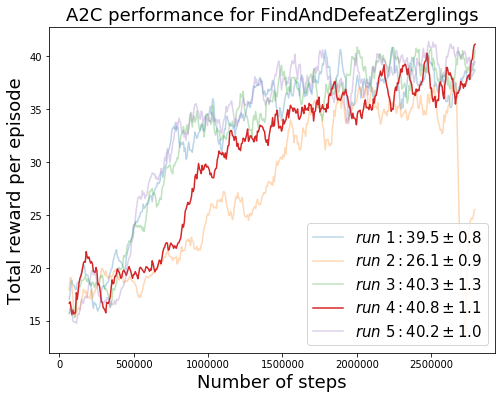

In [78]:
plot_n_runs(logs, best_idx, map_name, asymptotic_return, asymptotic_mean_err, 
            moving_average=True, average_window=10)

In [79]:
best_average = asymptotic_return[best_idx]
best_err = asymptotic_mean_err[best_idx]
print("Best run average : %.1f +/- %.1f"%(best_average,best_err))
nruns_average = asymptotic_return.mean()
nruns_err = asymptotic_return.std()
print("5 run average : %.1f +/- %.1f"%(nruns_average,nruns_err))

Best run average : 40.8 +/- 1.1
5 run average : 37.4 +/- 5.6


### DefeatZerglingsAndBanelings

In [80]:
IDs = ['IKKD','XYBK','UBSM','MPDF','HFCN']
map_name = 'DefeatZerglingsAndBanelings'

In [81]:
logs = []
shortest = 3000000
for ID in IDs:
    filename = '%s/%s/Logging/%s.txt'%(parent_dir, map_name, ID)
    logging = np.loadtxt(filename, delimiter=',', skiprows=1)
    print(logging.shape)
    logs.append(logging)
    if len(logging) < shortest:
        shortest = len(logging)
logs = np.array([logging[:shortest] for logging in logs])

(411, 2)
(416, 2)
(416, 2)
(416, 2)
(416, 2)


In [82]:
asymptotic_return = np.array([logging[-10:,1].mean() for logging in logs])
asymptotic_mean_err = np.array([logging[-10:,1].std()/np.sqrt(10) for logging in logs])
print("Asymptotic average return: ", asymptotic_return)
print("Asymptotic average return error: ", asymptotic_mean_err)
best_idx = np.argmax(asymptotic_return)
best_idx

Asymptotic average return:  [40.36 42.12 53.38 46.08  4.1 ]
Asymptotic average return error:  [1.89310327 2.5515799  1.99968998 3.46135234 3.88960152]


2

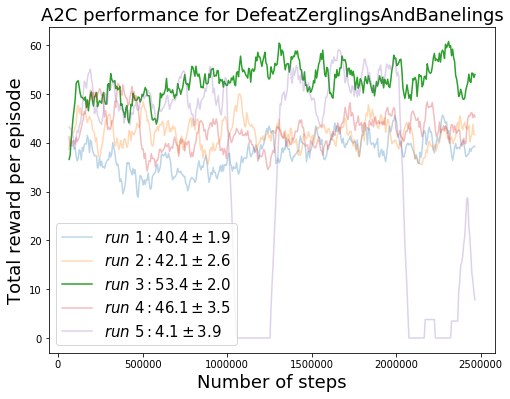

In [83]:
plot_n_runs(logs, best_idx, map_name, asymptotic_return, asymptotic_mean_err, 
            moving_average=True, average_window=10)

In [84]:
best_average = asymptotic_return[best_idx]
best_err = asymptotic_mean_err[best_idx]
print("Best run average : %.1f +/- %.1f"%(best_average,best_err))
nruns_average = asymptotic_return.mean()
nruns_err = asymptotic_return.std()
print("5 run average : %.1f +/- %.1f"%(nruns_average,nruns_err))

Best run average : 53.4 +/- 2.0
5 run average : 37.2 +/- 17.1


# Summary

| Map Name| Best Run Average | 5 Runs Average | DM Average | Steps to train |
| --- | --- | --- | --- | --- |
| MoveToBeacon | 25.5 (0.2) | 25.0 (0.3) | 26 | 0.6 M |
| CollectMineralShards | 106.3 (0.9) | 101 (7) | 103 | 2.8 M |
| FindAndDefeatZerglings | 41 (1) | 37 (6) | 45 | 2.8 M |
| DefeatZerglingsAndBanelings | 53 (2) | 37 (17) | 62 | 2.5 M |


# A2C performance and speed for different batch sizes

### Batch size 32

In [3]:
IDs = ['VJEP', 'FUCC', 'KNEX', 'HGEF', 'CMMB', 'POIR', 'DLTD', 'ROSQ', 'UDEB', 'GRTD']
times = np.array([106, 125, 122, 121, 112, 121, 105, 135, 129, 132])*60 #measured in seconds
CPU_eff32 = np.array([9.63, 9.52, 9.51, 9.45, 9.51])
GPU_eff32 = np.array([3.23, 3.82, 2.93, 3.05, 3.07])
#IDs = ['POIR', 'DLTD', 'ROSQ', 'UDEB', 'GRTD']
#times = np.array([121, 105, 135, 129, 132])*60
map_name = 'MoveToBeacon'

logs = []
steps_per_sec = []
shortest = 3000000
for i,ID in enumerate(IDs):
    filename = '%s/%s/Logging/%s.txt'%(parent_dir, map_name, ID)
    logging = np.loadtxt(filename, delimiter=',', skiprows=1)
    print(logging.shape)
    steps_per_sec.append(logging[-1,0]/times[i])
    logs.append(logging)
    if len(logging) < shortest:
        shortest = len(logging)
logs32 = np.array([logging[:shortest] for logging in logs])
steps_per_sec32 = np.array(steps_per_sec)[:5]
steps_per_sec32

(375, 2)
(375, 2)
(375, 2)
(375, 2)
(375, 2)
(375, 2)
(375, 2)
(375, 2)
(375, 2)
(375, 2)


array([3.53773585, 3.        , 3.07377049, 3.09917355, 3.34821429])

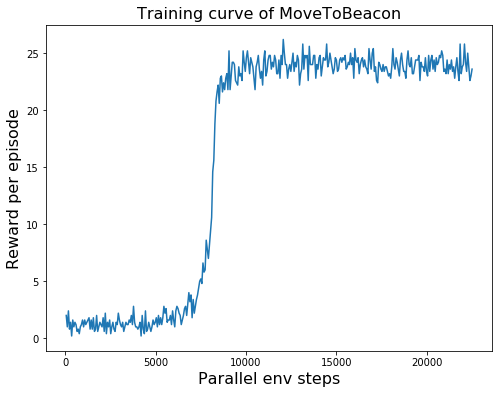

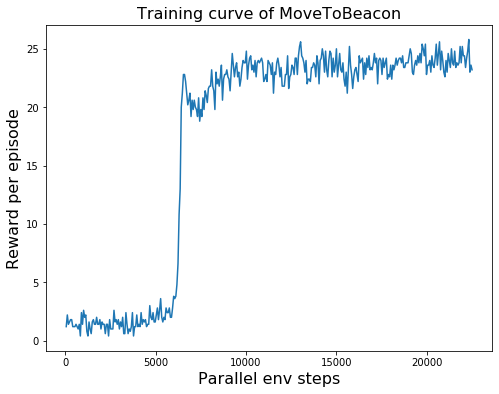

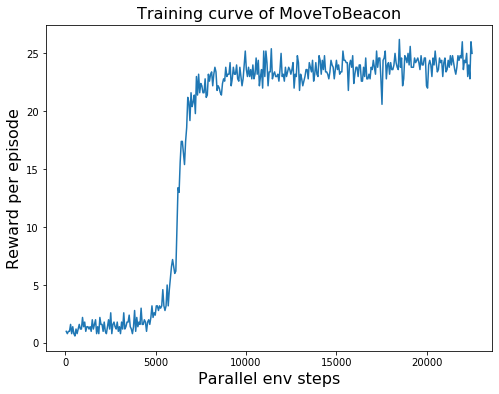

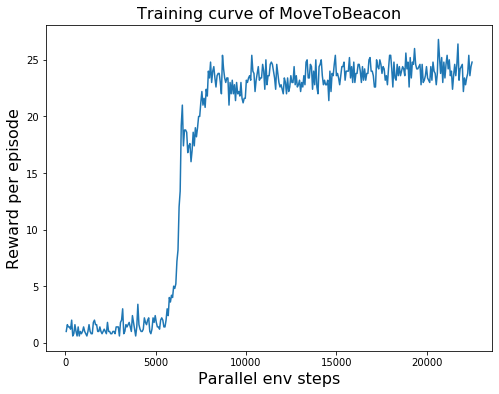

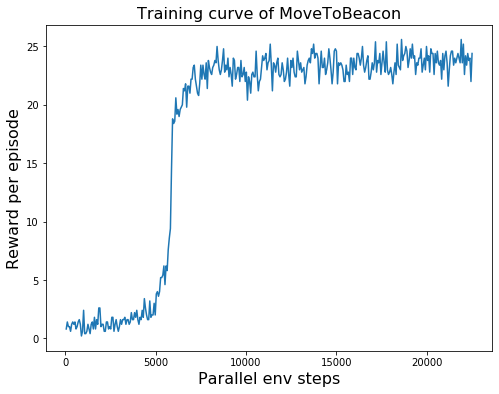

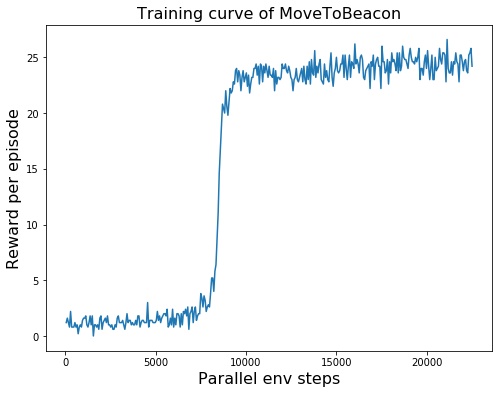

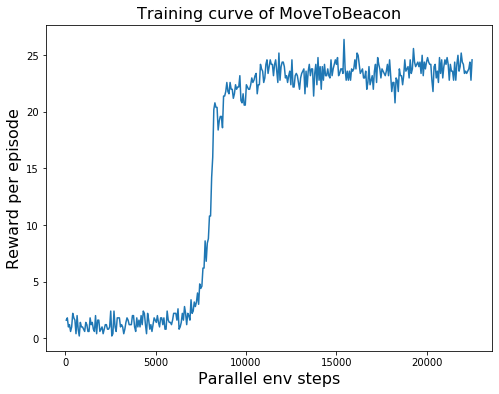

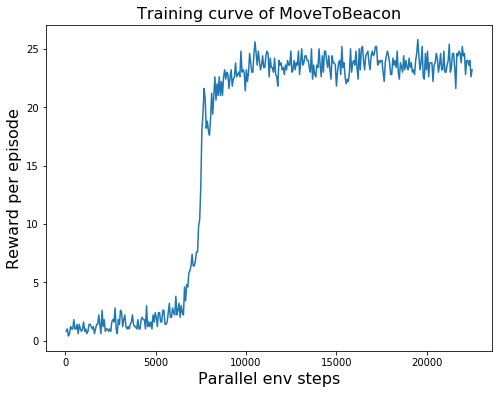

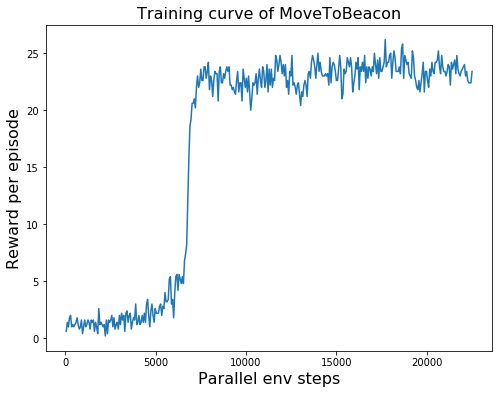

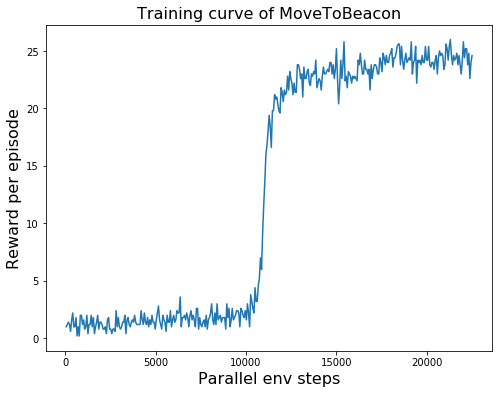

In [4]:
for logging in logs32:
    plot_logging(logging, map_name)

### Batch size 16

In [5]:
IDs = ['VCNR', 'WGTM', 'PQRY', 'NZZX', 'CGLL','DVLJ', 'QLOP', 'SCEL', 'CUYD', 'TPTQ']
times = np.array([164, 164, 164, 164, 165, 164, 240, 217, 221, 221])*60
CPU_eff16 = np.array([12.89, 12.89, 12.88, 12.90, 12.83])
GPU_eff16 = np.array([5.14, 4.93, 4.88, 4.63, 4.76])
#IDs = ['DVLJ', 'QLOP', 'SCEL', 'CUYD', 'TPTQ']
#times = np.array([164, 240, 217, 221, 221])*60
map_name = 'MoveToBeacon'

logs = []
steps_per_sec = []
shortest = 3000000
for i,ID in enumerate(IDs):
    filename = '%s/%s/Logging/%s.txt'%(parent_dir, map_name, ID)
    logging = np.loadtxt(filename, delimiter=',', skiprows=1)
    print(logging.shape)
    steps_per_sec.append(logging[-1,0]/times[i])
    logs.append(logging)
    if len(logging) < shortest:
        shortest = len(logging)
logs16 = np.array([logging[:shortest] for logging in logs])
steps_per_sec16 = np.array(steps_per_sec)[:5]
steps_per_sec16

(750, 2)
(750, 2)
(750, 2)
(750, 2)
(750, 2)
(750, 2)
(745, 2)
(750, 2)
(750, 2)
(750, 2)


array([4.57317073, 4.57317073, 4.57317073, 4.57317073, 4.54545455])

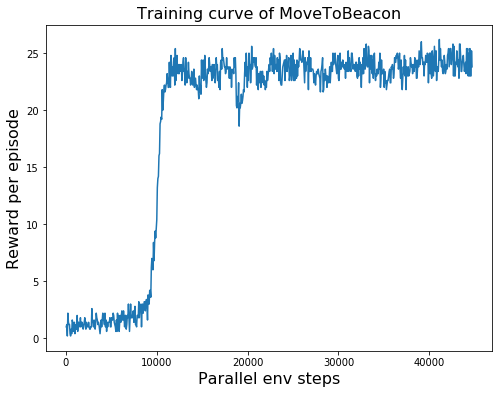

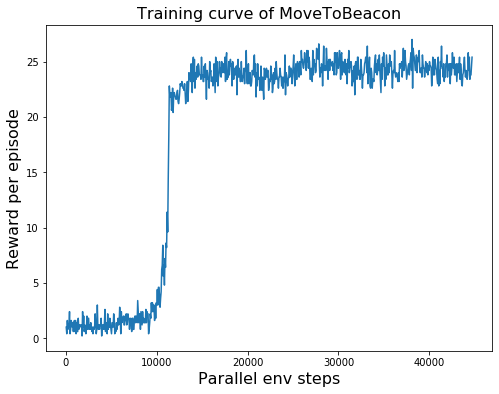

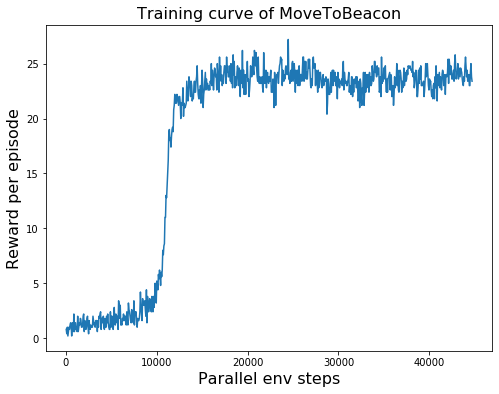

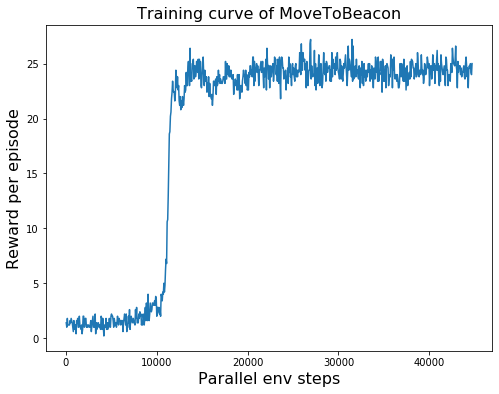

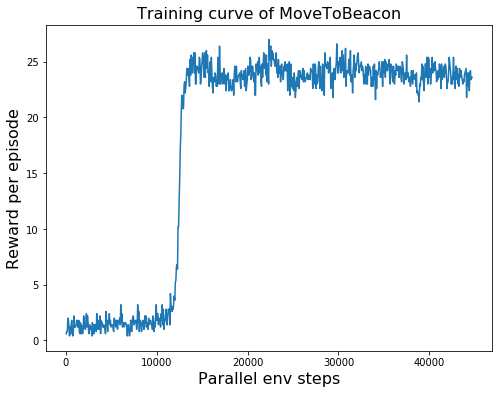

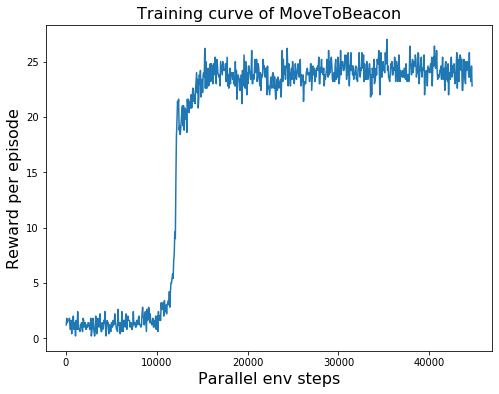

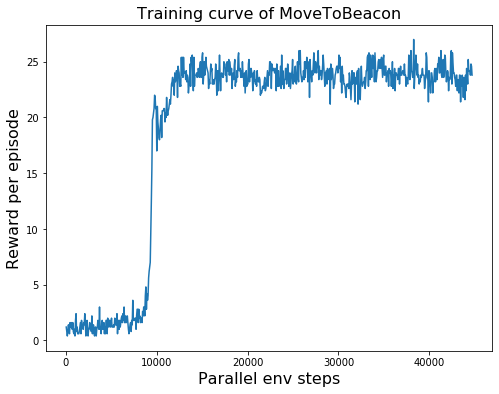

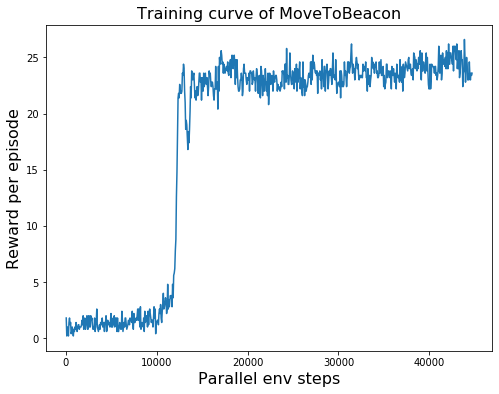

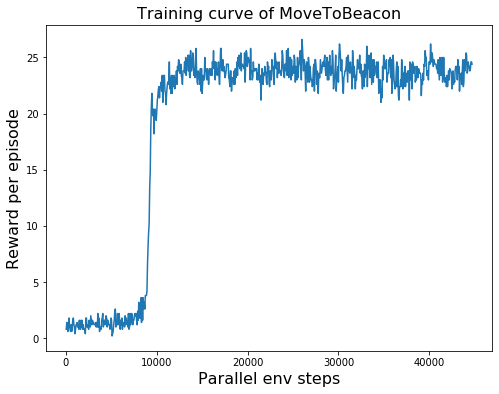

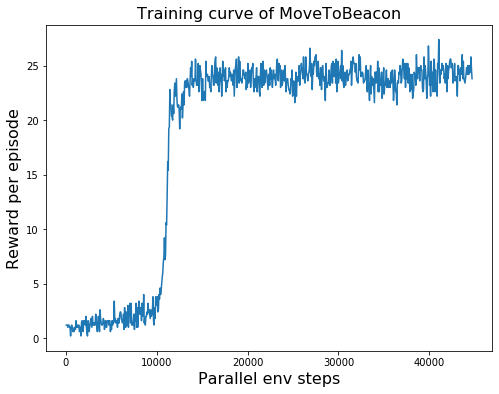

In [6]:
for logging in logs16:
    plot_logging(logging, map_name)

### Batch size 8

In [7]:
IDs = ['FFQB', 'SEBN', 'ZEMO', 'KCSY', 'ZSKR', 'PVJS', 'GAEY', 'FUDI', 'ADNC', 'GNBU']
times = np.array([291, 289, 291, 286, 293, 290, 360, 360, 360, 360])*60
CPU_eff8 = np.array([19.14, 19.15, 19.10, 19.10, 19.14])
GPU_eff8 = np.array([5.18, 5.53, 5.31, 5.27, 5.2])
map_name = 'MoveToBeacon'

logs = []
steps_per_sec = []
shortest = 3000000
for i,ID in enumerate(IDs):
    filename = '%s/%s/Logging/%s.txt'%(parent_dir, map_name, ID)
    logging = np.loadtxt(filename, delimiter=',', skiprows=1)
    print(logging.shape)
    steps_per_sec.append(logging[-1,0]/times[i])
    logs.append(logging)
    if len(logging) < shortest:
        shortest = len(logging)
logs8 = np.array([logging[:shortest] for logging in logs])
steps_per_sec8 = np.array(steps_per_sec)[:5]
steps_per_sec8

(1500, 2)
(1500, 2)
(1500, 2)
(1500, 2)
(1500, 2)
(1500, 2)
(1260, 2)
(1229, 2)
(1259, 2)
(1261, 2)


array([5.15463918, 5.19031142, 5.15463918, 5.24475524, 5.11945392])

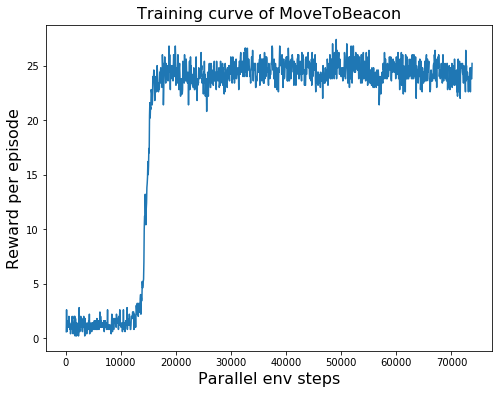

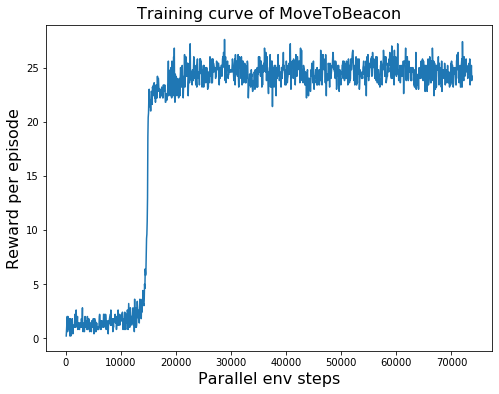

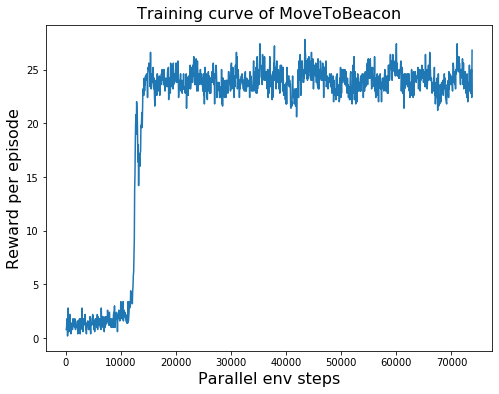

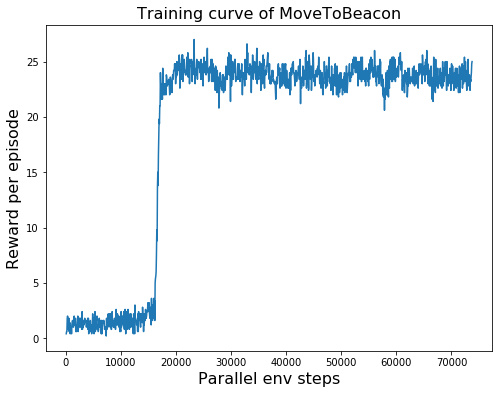

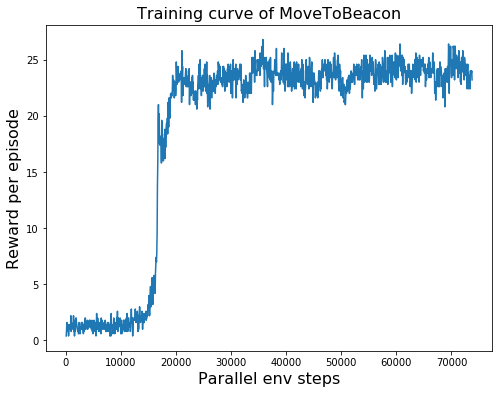

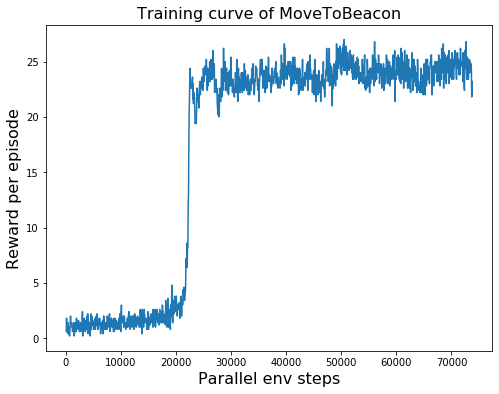

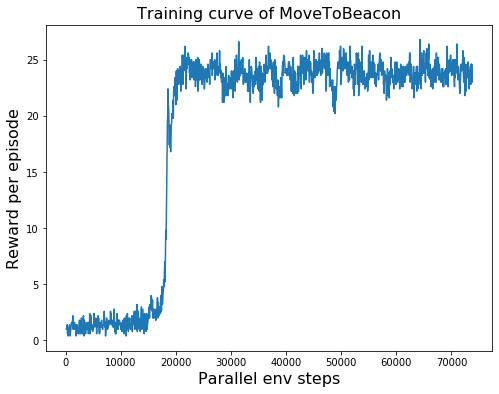

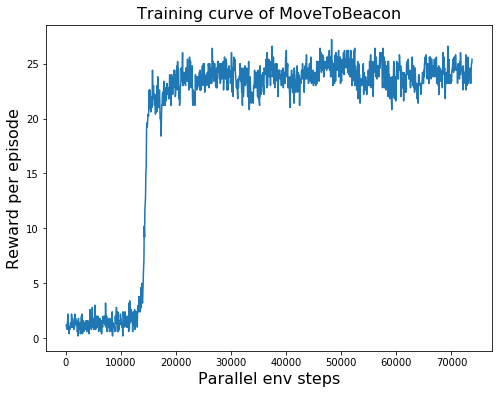

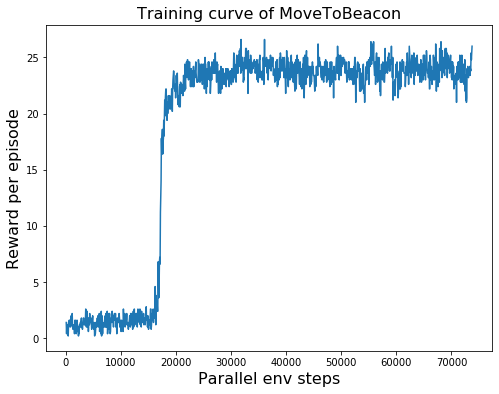

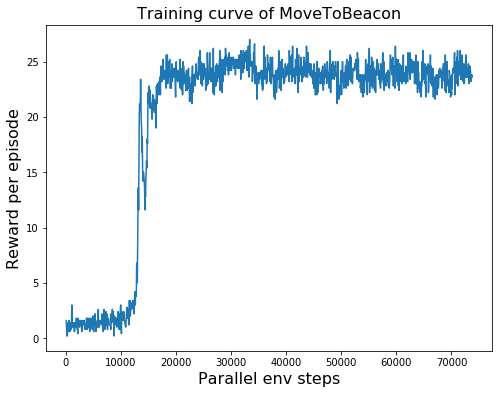

In [8]:
for logging in logs8:
    plot_logging(logging, map_name)

### Batch size 4

In [9]:
IDs = ['PFNQ', 'XXDY', 'FBYX', 'COPW', 'QZMX', 'EQJT', 'WYBD', 'OLPG', 'KEOJ', 'NMOH']
times = np.array([669, 670, 656, 588, 660, 545, 660, 660, 660, 660])*60
CPU_eff4 = np.array([30.80, 30.80, 30.82, 30.92, 30.82])
GPU_eff4 = np.array([4.46, 4.47, 4.57, 5.13, 4.53])
map_name = 'MoveToBeacon'

logs = []
steps_per_sec = []
shortest = 3000000
for i,ID in enumerate(IDs):
    filename = '%s/%s/Logging/%s.txt'%(parent_dir, map_name, ID)
    logging = np.loadtxt(filename, delimiter=',', skiprows=1)
    print(logging.shape)
    steps_per_sec.append(logging[-1,0]/times[i])
    logs.append(logging)
    if len(logging) < shortest:
        shortest = len(logging)
logs4 = np.array([logging[:shortest] for logging in logs])
steps_per_sec4 = np.array(steps_per_sec)[:5]
steps_per_sec4

(3000, 2)
(3000, 2)
(3000, 2)
(3000, 2)
(3000, 2)
(3000, 2)
(2268, 2)
(2276, 2)
(2217, 2)
(2309, 2)


array([4.48430493, 4.47761194, 4.57317073, 5.10204082, 4.54545455])

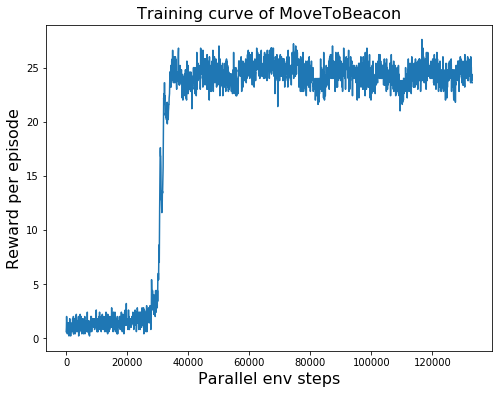

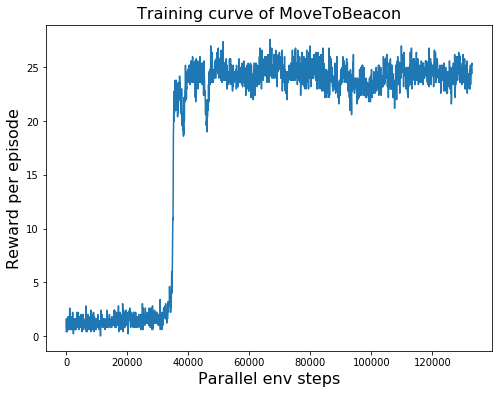

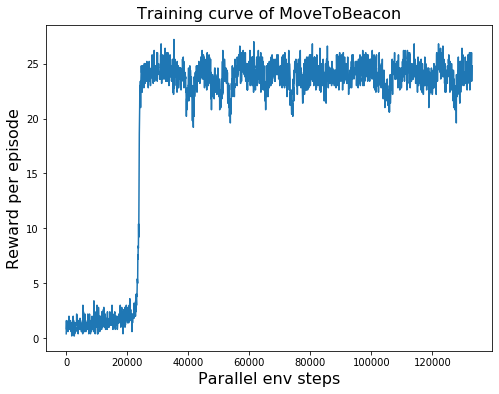

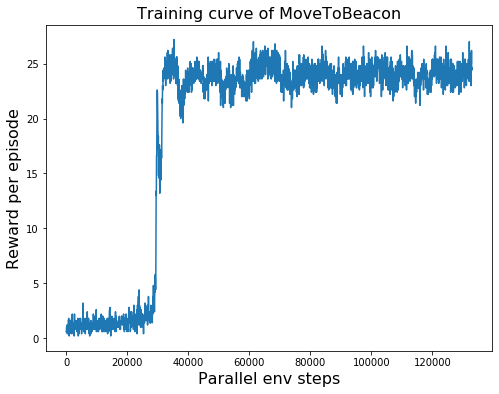

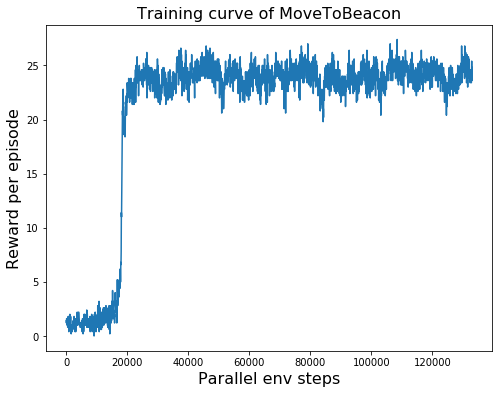

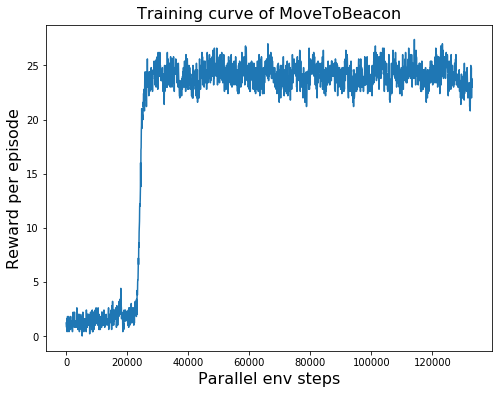

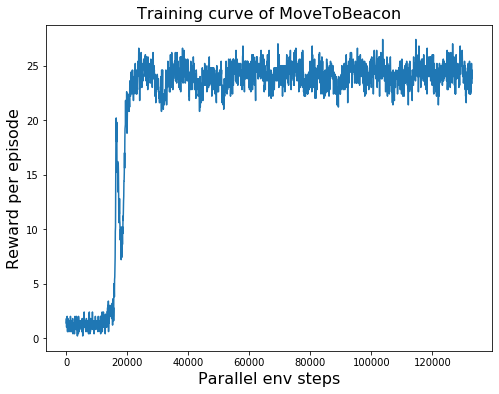

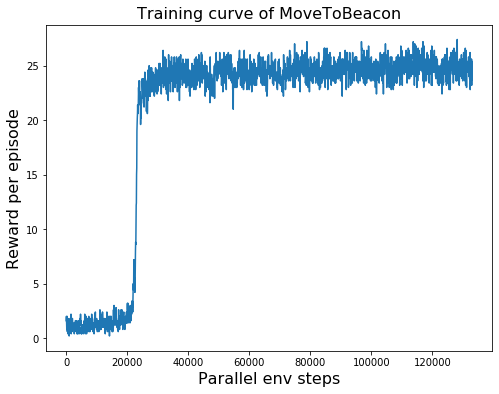

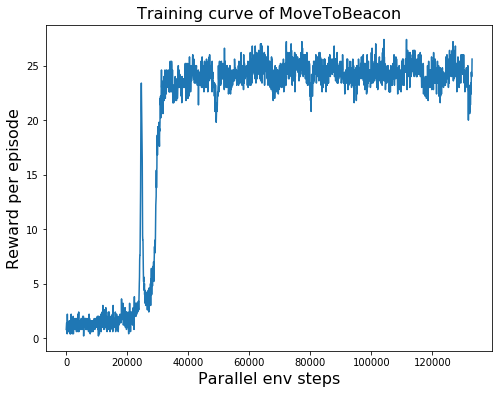

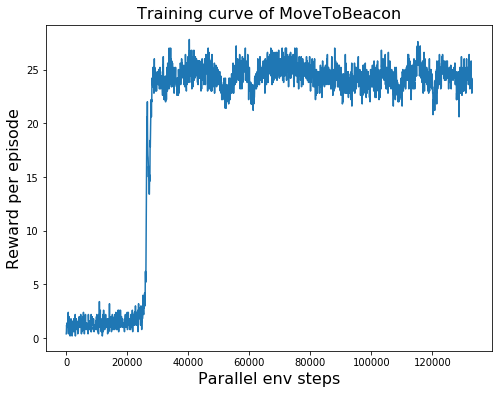

In [10]:
for logging in logs4:
    plot_logging(logging, map_name)

### Batch size 2

In [11]:
#IDs = ['NWSB', 'RVOB', 'GFUM', 'ZALS', 'LPDR']
#times = np.array([1120, 1200, 1200, 1200, 1200])*60
IDs = ['NXIB', 'FMVG', 'UOSG', 'GIOK', 'LUFE', 'NWSB', 'RVOB', 'GFUM', 'ZALS', 'LPDR']
times = np.array([1468, 1419, 1279, 1447, 1126, 1120, 1200, 1200, 1200, 1200])*60
CPU_eff2 = np.array([53.31, 53.29, 53.10, 53.22, 53.40])
GPU_eff2 = np.array([3.92, 4.27, 4.45, 4.19, 5.07])
map_name = 'MoveToBeacon'

logs = []
steps_per_sec = []
shortest = 3000000
for i,ID in enumerate(IDs):
    filename = '%s/%s/Logging/%s.txt'%(parent_dir, map_name, ID)
    logging = np.loadtxt(filename, delimiter=',', skiprows=1)
    print(logging.shape)
    steps_per_sec.append(logging[-1,0]/times[i])
    logs.append(logging)
    if len(logging) < shortest:
        shortest = len(logging)
logs2 = np.array([logging[:shortest] for logging in logs])
steps_per_sec2 = np.array(steps_per_sec)[:5]
steps_per_sec2

(6000, 2)
(6000, 2)
(6000, 2)
(6000, 2)
(6000, 2)
(6000, 2)
(4809, 2)
(4343, 2)
(4450, 2)
(4376, 2)


array([4.08719346, 4.22832981, 4.69116497, 4.14651002, 5.3285968 ])

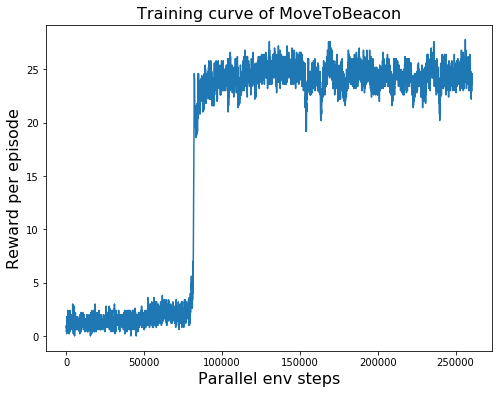

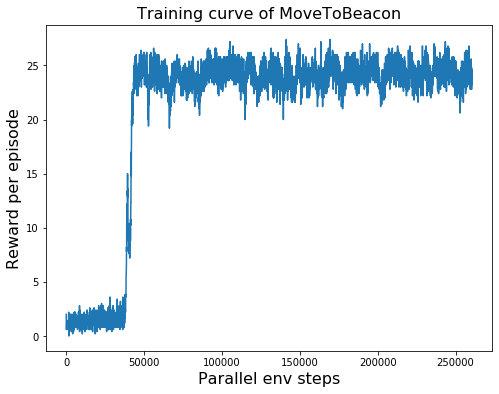

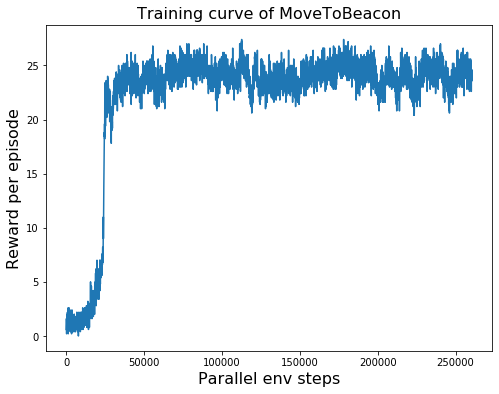

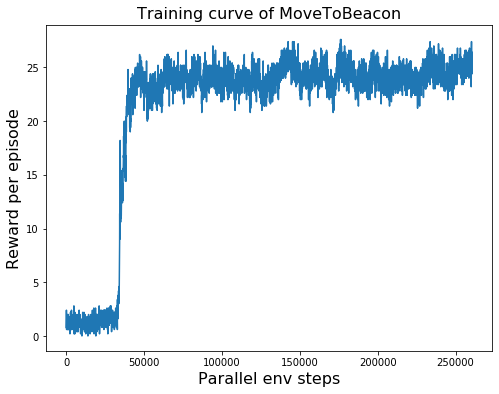

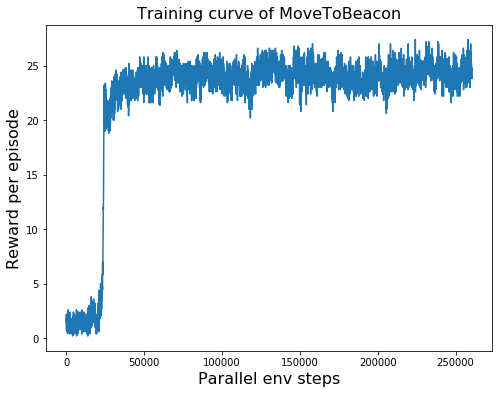

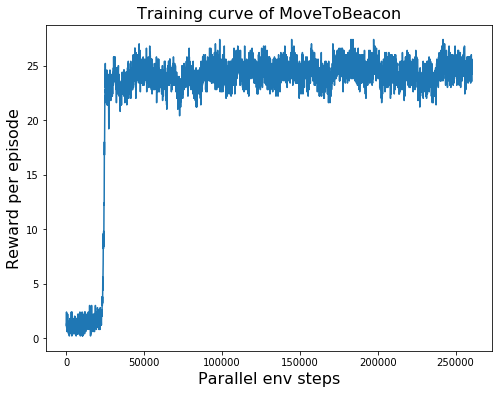

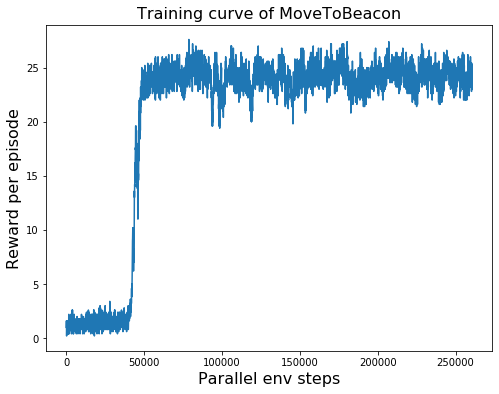

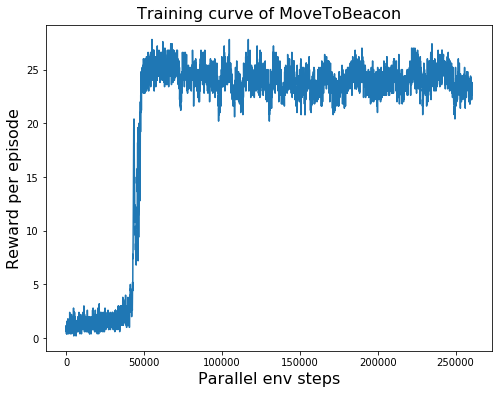

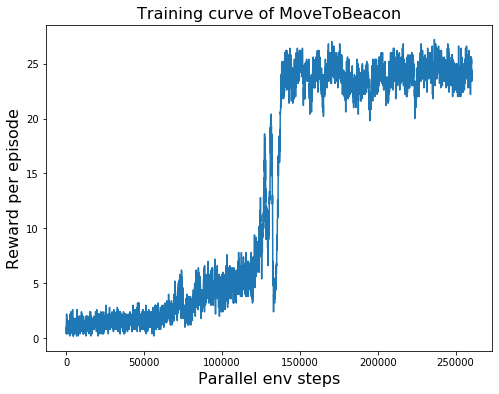

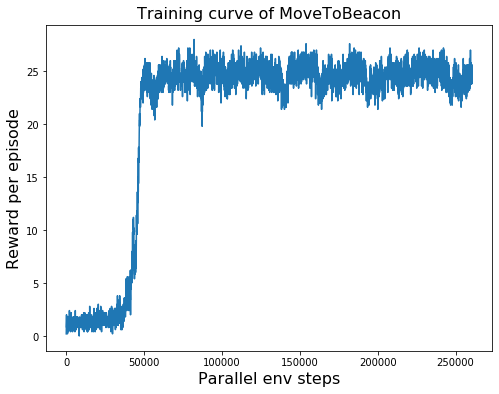

In [12]:
for logging in logs2:
    plot_logging(logging, map_name)

### Batch size 1

In [13]:
IDs = ['HFTD', 'TDJY', 'VSHL', 'DVHJ', 'XSVB', 'RMVZ', 'FUIW', 'HINK', 'SGNV', 'DHIX']
times = np.array([2080, 2142, 2169, 2096, 2087, 2008, 2640, 2640, 2640, 2640])*60
#IDs = ['RMVZ', 'FUIW', 'HINK', 'SGNV', 'DHIX']
#times = np.array([2008, 2640, 2640, 2640, 2640])*60
CPU_eff1 = np.array([98.58, 98.43, 95.83, 98.42, 98.61])
GPU_eff1 = np.array([4.9, 5.62, 5.17, 4.98, 5.62]) 
map_name = 'MoveToBeacon'

logs = []
steps_per_sec = []
shortest = 3000000
for i,ID in enumerate(IDs):
    filename = '%s/%s/Logging/%s.txt'%(parent_dir, map_name, ID)
    logging = np.loadtxt(filename, delimiter=',', skiprows=1)
    print(logging.shape)
    print(logging[-1,0])
    steps_per_sec.append(logging[-1,0]/times[i])
    logs.append(logging)
    if len(logging) < shortest:
        shortest = len(logging)
logs1 = np.array([logging[:shortest] for logging in logs])
steps_per_sec1 = np.array(steps_per_sec)[:5]
steps_per_sec1

(12000, 2)
720000.0
(12000, 2)
720000.0
(12000, 2)
720000.0
(12000, 2)
720000.0
(12000, 2)
720000.0
(8338, 2)
500280.0
(8418, 2)
505080.0
(8428, 2)
505680.0
(8406, 2)
504360.0
(8416, 2)
504960.0


array([5.76923077, 5.6022409 , 5.53250346, 5.72519084, 5.74988021])

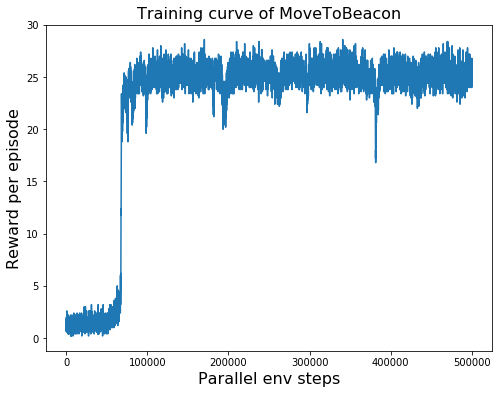

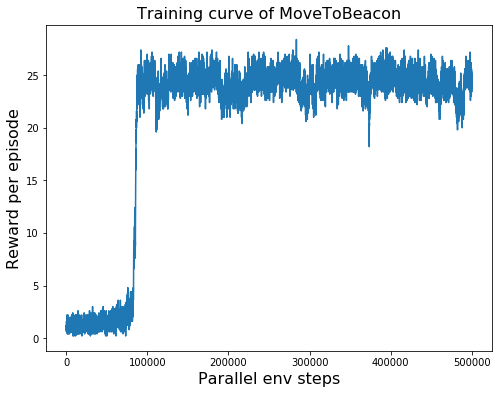

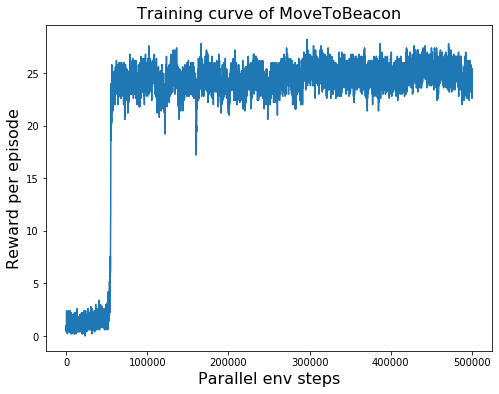

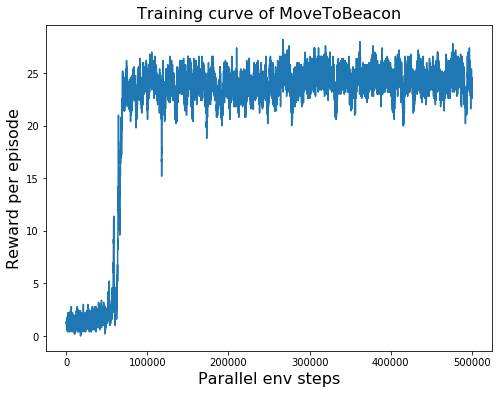

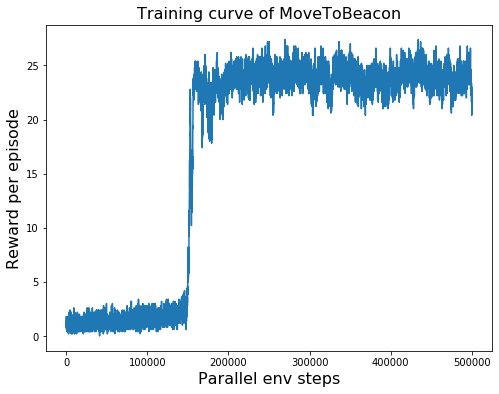

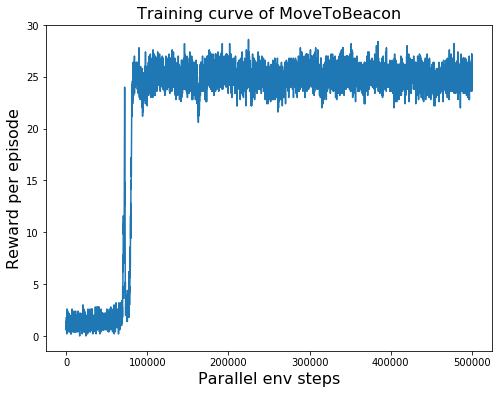

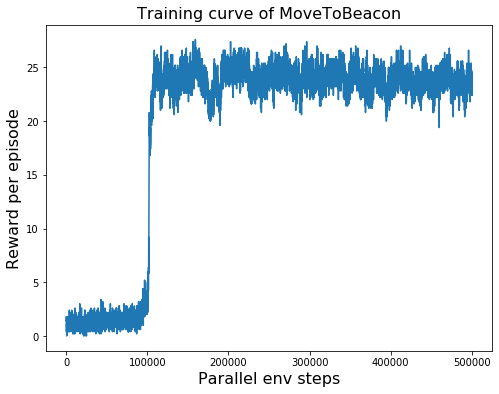

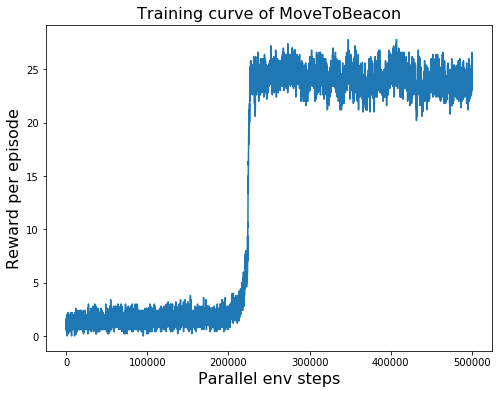

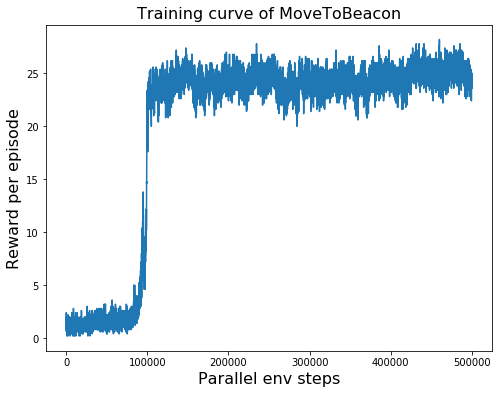

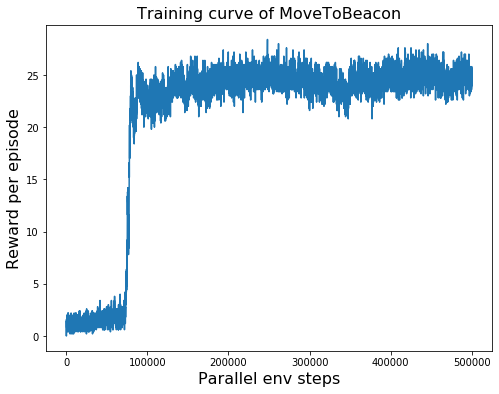

In [14]:
for logging in logs1:
    plot_logging(logging, map_name)

In [15]:
logs = [logs1, logs2, logs4, logs8, logs16, logs32]
steps_per_sec = [steps_per_sec1, steps_per_sec2, steps_per_sec4, steps_per_sec8, steps_per_sec16, steps_per_sec32]
CPU_effs = np.array([CPU_eff1, CPU_eff2, CPU_eff4, CPU_eff8, CPU_eff16, CPU_eff32])
GPU_effs = np.array([GPU_eff1, GPU_eff2, GPU_eff4, GPU_eff8, GPU_eff16, GPU_eff32])
average_logs = [l.mean(axis=0) for l in logs]
average_FPS = np.array([s[1:].mean(axis=0) for s in steps_per_sec])
FPS_err = np.array([s[1:].std(axis=0) for s in steps_per_sec])

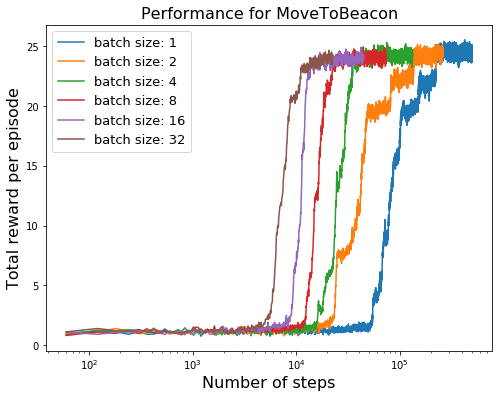

In [16]:
plt.figure(figsize=(8,6))
for n in range(len(average_logs)):
    log_n = average_logs[n]
    steps = log_n[:,0]
    returns = log_n[:,1]

    label = 'batch size: %d'%(2**n)
    plt.plot(steps, returns, label=label)

plt.legend(fontsize=13)
plt.title("Performance for %s"%map_name, fontsize=16)
plt.xlabel("Number of steps", fontsize=16)
plt.ylabel("Total reward per episode", fontsize=16)
plt.xscale('log')
plt.show()

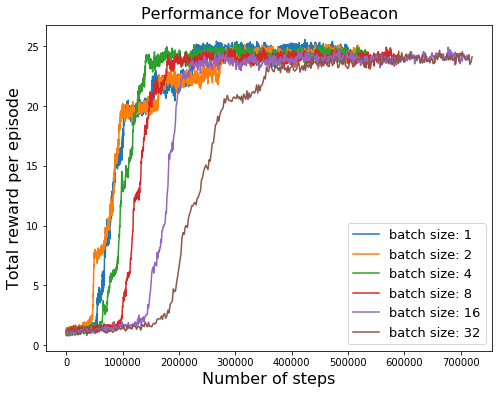

In [17]:
plt.figure(figsize=(8,6))
for n in range(len(average_logs)):
    log_n = average_logs[n]
    steps = log_n[:,0]*(2**n)
    returns = log_n[:,1]

    label = 'batch size: %d'%(2**n)
    plt.plot(steps, returns, label=label)

plt.legend(fontsize=13)
plt.title("Performance for %s"%map_name, fontsize=16)
plt.xlabel("Number of steps", fontsize=16)
plt.ylabel("Total reward per episode", fontsize=16)
plt.show()

### Estimating time to convergence

Idea: consider a window of m consecutive measures, then the algorithm converges the first time m measures have a compatible average with the asymptotic one.

In [18]:
C = 3.0 # convergence ratio
W = 10 # averaging window 
convergence_steps = []
for n in range(len(logs)):
    log_n = logs[n]
    steps = log_n[:,:,0]
    returns = log_n[:,:,1]
    
    # asymptotic mean return and its standard deviation
    mu_a = returns[:,-W:].mean(axis=1)
    #print('\nmu_a: ', mu_a)
    sigma_a = returns[:,-W:].std(axis=1)/np.sqrt(W)
    #print('sigma_a: ', sigma_a)
    # convergence mean return
    mu_c = mu_a - C*sigma_a
    #print('mu_c: ', mu_c)
    # window average for all points in [0:-W]
    window_average = np.array([returns[:,i:i+W].mean(axis=1) for i in range(len(returns[0])-W)])
    #print(window_average.shape)
    convergence_mask = (window_average > mu_c)
    #print(convergence_mask.shape)
    convergence_index = np.argmax(convergence_mask, axis=0)
    #print(convergence_index.shape)
    #print(convergence_index)
    convergence_step = steps[np.arange(len(convergence_index)),convergence_index]
    convergence_steps.append(convergence_step)
#print('\nConvergence steps: ', convergence_steps)

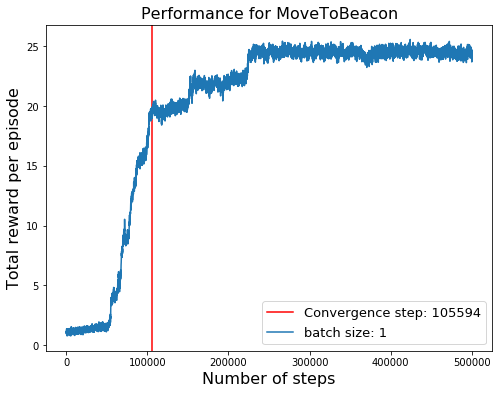

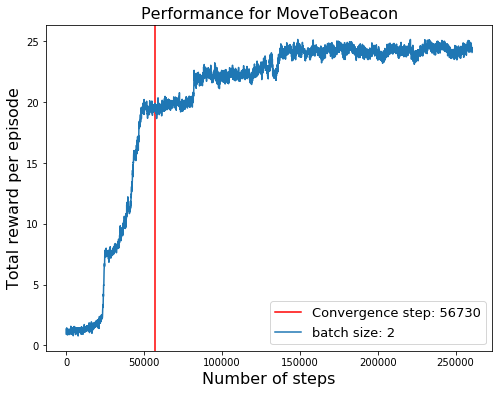

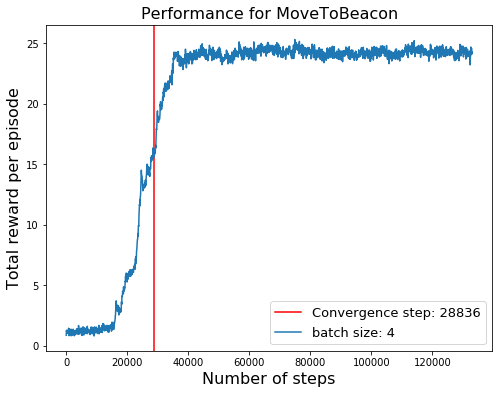

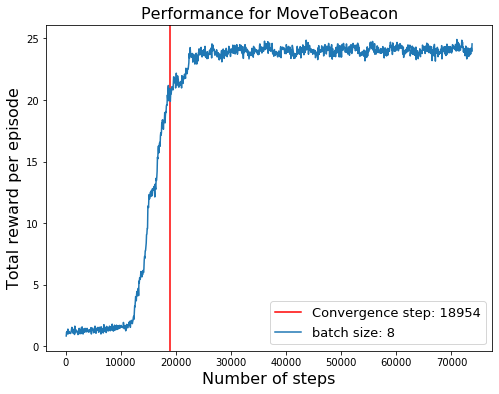

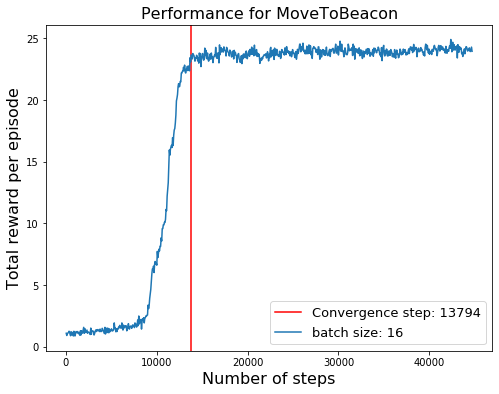

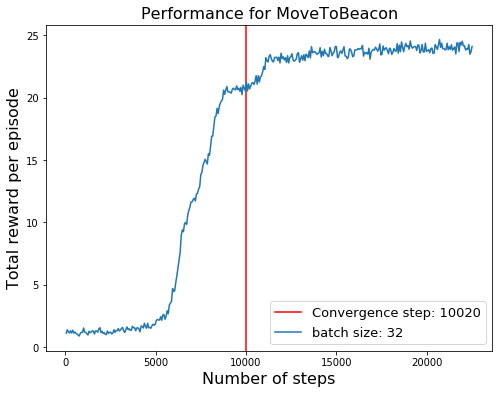

In [19]:
for n in range(len(average_logs)):
    plt.figure(figsize=(8,6))
    log_n = average_logs[n]
    steps = log_n[:,0]
    returns = log_n[:,1]
    plt.axvline(convergence_steps[n].mean(), label='Convergence step: %d'%convergence_steps[n].mean(), c='r')
    
    label = 'batch size: %d'%(2**n)
    plt.plot(steps, returns, label=label)

    plt.legend(fontsize=13)
    plt.title("Performance for %s"%map_name, fontsize=16)
    plt.xlabel("Number of steps", fontsize=16)
    plt.ylabel("Total reward per episode", fontsize=16)
    plt.show()

In [20]:
def plot_moving_average(x, y, ax, average_window=20, **kwargs):
    X = x[:-average_window]
    Y = np.array([y[i:i+average_window].mean() for i in range(len(y)-average_window)])
    p = ax.plot(X, Y, **kwargs)
    return p

def plot_n_runs(x, y, label, ax):
    """
    x.shape = (n_epochs,)
    y.shape = (n_runs, n_epochs)
    """
    average = y.mean(axis=0)
    p = plot_moving_average(x, average, ax, alpha=0.9, label=label)
    c = p[-1].get_color()
    for b in range(y.shape[0]):
        plot_moving_average(x, y[b], ax, alpha=0.2, c=c)

In [21]:
logs[0].shape

(10, 8338, 2)

steps.shape:  (8338,)
returns.shape:  (10, 8338)
steps.shape:  (4343,)
returns.shape:  (10, 4343)
steps.shape:  (2217,)
returns.shape:  (10, 2217)


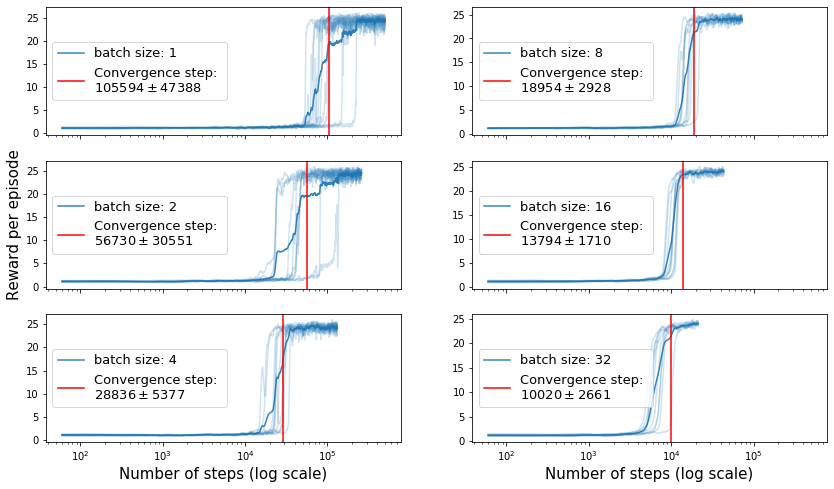

In [22]:
fig, axes = plt.subplots(3,2, sharex=True, figsize=(14,8))
#fig.suptitle('Total reward per episode for different batch sizes', fontsize=16)
for n in range(3):
    log_n = logs[n]
    steps = log_n[0,:,0]
    returns = log_n[:,:,1]
    print('steps.shape: ', steps.shape)
    print('returns.shape: ', returns.shape)
    label = 'batch size: %d'%(2**n)
    plot_n_runs(steps, returns, label, axes[n,0])
    line_label = 'Convergence step: \n'+r'$%d \pm %d$'%(convergence_steps[n].mean(),convergence_steps[n].std())
    axes[n,0].axvline(convergence_steps[n].mean(), 
                    label=line_label, 
                    c='r')
    axes[n,0].legend(fontsize=13, loc='center left')
    
for n in range(3,6):
    m = n-3
    log_n = logs[n]
    steps = log_n[0,:,0]
    returns = log_n[:,:,1]

    label = 'batch size: %d'%(2**n)
    plot_n_runs(steps, returns, label, axes[m,1])
    line_label = 'Convergence step: \n'+r'$%d \pm %d$'%(convergence_steps[n].mean(),convergence_steps[n].std())
    axes[m,1].axvline(convergence_steps[n].mean(), 
                    label=line_label, 
                    c='r')
    axes[m,1].legend(fontsize=13, loc='center left')
    
axes[2,0].set_xlabel("Number of steps (log scale)", fontsize=15)
axes[2,1].set_xlabel("Number of steps (log scale)", fontsize=15)
axes[1,0].set_ylabel("Reward per episode", fontsize=15)
plt.xscale('log')
plt.show()

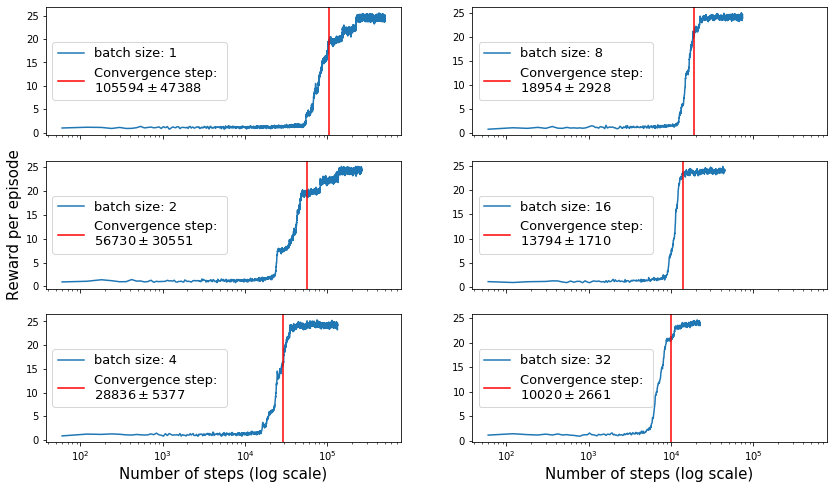

In [23]:
fig, axes = plt.subplots(3,2, sharex=True, figsize=(14,8))
#fig.suptitle('Total reward per episode for different batch sizes', fontsize=16)
for n in range(3):
    log_n = average_logs[n]
    steps = log_n[:,0]
    returns = log_n[:,1]

    label = 'batch size: %d'%(2**n)
    axes[n,0].plot(steps, returns, label=label)
    line_label = 'Convergence step: \n'+r'$%d \pm %d$'%(convergence_steps[n].mean(),convergence_steps[n].std())
    axes[n,0].axvline(convergence_steps[n].mean(), 
                    label=line_label, 
                    c='r')
    axes[n,0].legend(fontsize=13, loc='center left')
    
for n in range(3,6):
    m = n-3
    log_n = average_logs[n]
    steps = log_n[:,0]
    returns = log_n[:,1]

    label = 'batch size: %d'%(2**n)
    axes[m,1].plot(steps, returns, label=label)
    line_label = 'Convergence step: \n'+r'$%d \pm %d$'%(convergence_steps[n].mean(),convergence_steps[n].std())
    axes[m,1].axvline(convergence_steps[n].mean(), 
                    label=line_label, 
                    c='r')
    axes[m,1].legend(fontsize=13, loc='center left')
    
axes[2,0].set_xlabel("Number of steps (log scale)", fontsize=15)
axes[2,1].set_xlabel("Number of steps (log scale)", fontsize=15)
axes[1,0].set_ylabel("Reward per episode", fontsize=15)
plt.xscale('log')
plt.show()

In [24]:
batch_sizes = np.array([2**n for n in range(6)])
convergence_steps = np.array(convergence_steps)
mean_convergence = convergence_steps.mean(axis=1)
std_convergence = convergence_steps.std(axis=1)
ratio = mean_convergence[0]/mean_convergence
ratio_err = ratio[1:]*np.sqrt(
(std_convergence[0]/mean_convergence[0])**2 + (std_convergence[1:]/mean_convergence[1:])**2
)
ratio_err = np.concatenate([[0],ratio_err])

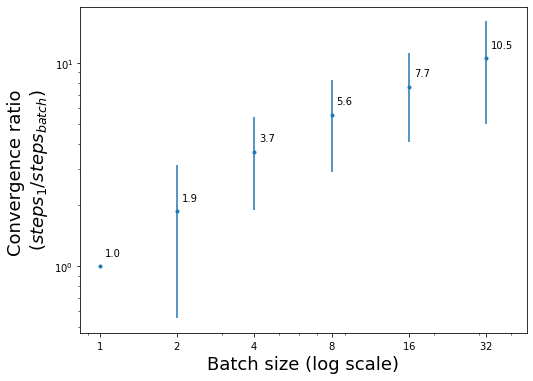

In [28]:
batch_sizes = np.array([2**n for n in range(6)])
plt.figure(figsize=(8,6))
plt.errorbar(batch_sizes, ratio, ratio_err, fmt='.')
plt.xlabel('Batch size (log scale)', fontsize=18)
plt.ylabel('Convergence ratio \n$(steps_1 / steps_{batch})$', fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.xlim(xmax=46)
plt.xticks(batch_sizes, labels=[r'$%s$'%b for b in batch_sizes])
for i,j in zip(batch_sizes,ratio):
    plt.annotate("%.1f"%j, xy=(i,j), xytext=(5,10), textcoords='offset points')
plt.show()

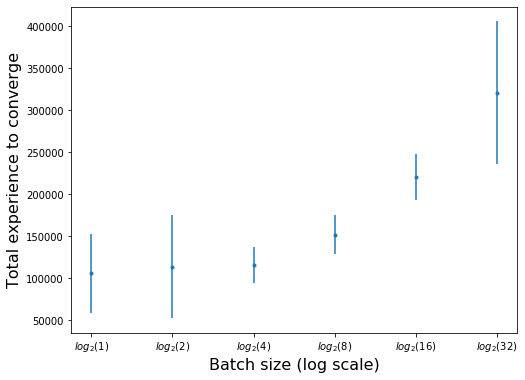

In [29]:
batch_sizes = np.array([2**n for n in range(6)])
convergence_steps = np.array(convergence_steps)
plt.figure(figsize=(8,6))
plt.errorbar(np.log2(batch_sizes), 
             convergence_steps.mean(axis=1)*batch_sizes, 
             convergence_steps.std(axis=1)*batch_sizes, 
             fmt='.')
plt.xlabel('Batch size (log scale)', fontsize=16)
plt.ylabel('Total experience to converge', fontsize=16)
#plt.yscale('log')
#
plt.xticks(np.log2(batch_sizes), labels=[r'$log_2(%s)$'%b for b in batch_sizes])
#plt.xscale('log')
plt.show()

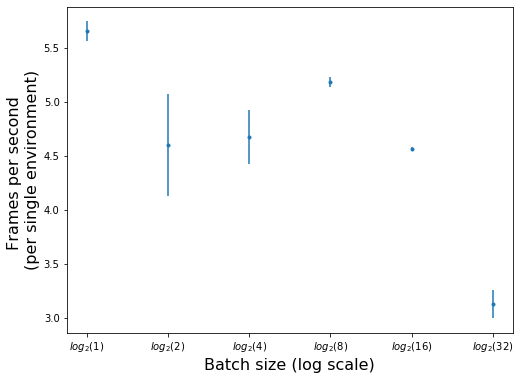

In [30]:
batch_sizes = np.array([2**n for n in range(6)])
plt.figure(figsize=(8,6))
plt.errorbar(np.log2(batch_sizes), average_FPS, FPS_err,  fmt='.')
plt.xlabel('Batch size (log scale)', fontsize=16)
plt.ylabel('Frames per second \n(per single environment)', fontsize=16)
plt.xticks(np.log2(batch_sizes), labels=[r'$log_2(%s)$'%b for b in batch_sizes])
plt.show()

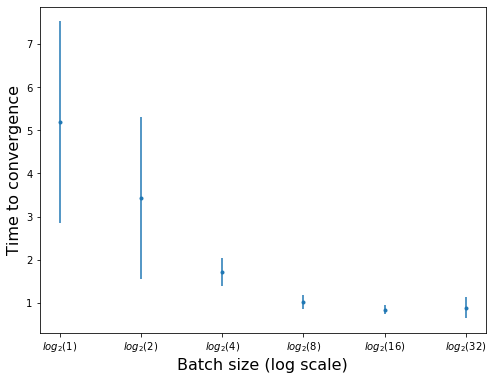

In [31]:
batch_sizes = np.array([2**n for n in range(6)])
mean_convergence_times = mean_convergence/average_FPS
times_error = mean_convergence_times*np.sqrt(
(std_convergence/mean_convergence)**2 + (FPS_err/average_FPS)**2
)
plt.figure(figsize=(8,6))
plt.errorbar(np.log2(batch_sizes), 
             mean_convergence_times/3600, 
             times_error/3600,  
             fmt='.')
plt.xlabel('Batch size (log scale)', fontsize=16)
plt.ylabel('Time to convergence', fontsize=16)
plt.xticks(np.log2(batch_sizes), labels=[r'$log_2(%s)$'%b for b in batch_sizes])
#plt.yscale('log')
plt.show()

In [32]:
t_ratio = mean_convergence_times[0]/mean_convergence_times
t_ratio_err = t_ratio[1:]*np.sqrt(
(times_error[0]/mean_convergence_times[0])**2 + (times_error[1:]/mean_convergence_times[1:])**2
)
t_ratio_err = np.concatenate([[0],t_ratio_err])

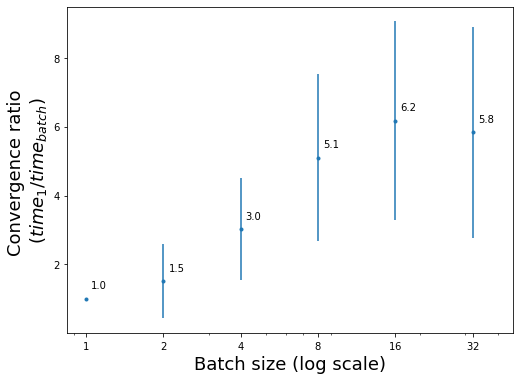

In [33]:
batch_sizes = np.array([2**n for n in range(6)])
plt.figure(figsize=(8,6))
plt.errorbar(batch_sizes, t_ratio, t_ratio_err, fmt='.')
plt.xlabel('Batch size (log scale)', fontsize=18)
plt.ylabel('Convergence ratio \n$(time_1 / time_{batch})$', fontsize=18)
plt.xscale('log')
plt.xlim(xmax=46)
plt.xticks(batch_sizes, labels=[r'$%s$'%b for b in batch_sizes])
for i,j in zip(batch_sizes,t_ratio):
    plt.annotate("%.1f"%j, xy=(i,j), xytext=(5,10), textcoords='offset points')
plt.show()

This is roughly similar to steps to convergence, since the FPS are very similar among different batch sizes

$$t = frames/FPS$$

$$
\sigma_t = |t| \sqrt{(\frac{\sigma_{frames}}{frames})^2 + (\frac{\sigma_{FPS}}{FPS})^2}
$$

In [34]:
from scipy import optimize

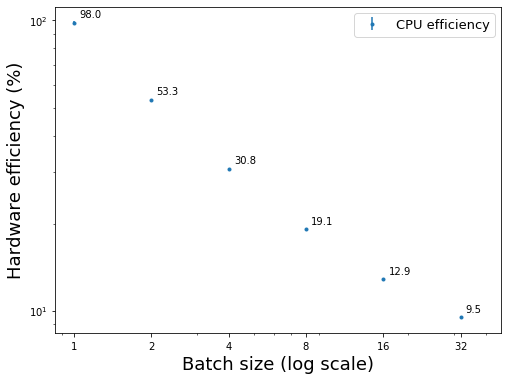

In [35]:
batch_sizes = np.array([2**n for n in range(6)])
CPU_mean_effs = CPU_effs.mean(axis=1)
CPU_std_effs = CPU_effs.std(axis=1)
plt.figure(figsize=(8,6))
plt.errorbar(batch_sizes, CPU_mean_effs, CPU_std_effs, fmt='.', label='CPU efficiency')
plt.xlabel('Batch size (log scale)', fontsize=18)
plt.ylabel('Hardware efficiency (%)', fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.xlim(xmax=46)
plt.xticks(batch_sizes, labels=[r'$%s$'%b for b in batch_sizes])
for i,j in zip(batch_sizes,CPU_mean_effs):
    plt.annotate("%.1f"%j, xy=(i,j), xytext=(5,5), textcoords='offset points')
plt.legend(fontsize=13)
plt.show()

In [36]:
from scipy import stats
x = np.log(batch_sizes)
y = np.log(CPU_mean_effs)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [37]:
from scipy.optimize import curve_fit

In [38]:
y_err = CPU_std_effs/CPU_mean_effs

In [39]:
y_err

array([0.01096964, 0.00187969, 0.00145628, 0.00112625, 0.00192727,
       0.00614395])

In [40]:
def linear(x, slope, intercept):
    return slope*x+intercept
popt, pcov = curve_fit(linear, x, y, sigma=y_err)

In [41]:
popt

array([-0.67933108,  4.39349103])

In [42]:
pcov

array([[ 0.00113195, -0.00203933],
       [-0.00203933,  0.00419139]])

In [43]:
def fit_func(x, slope, intercept):
    return np.exp(slope*np.log(x)+intercept)

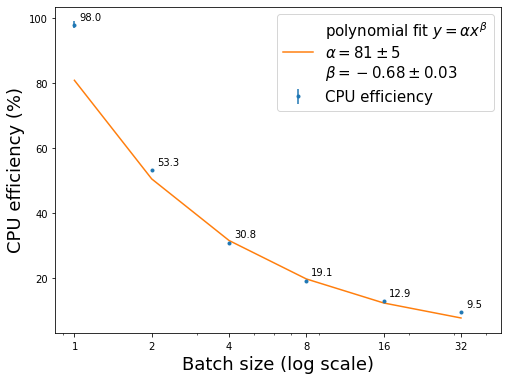

In [44]:
batch_sizes = np.array([2**n for n in range(6)])
CPU_mean_effs = CPU_effs.mean(axis=1)
CPU_std_effs = CPU_effs.std(axis=1)
plt.figure(figsize=(8,6))
plt.errorbar(batch_sizes, CPU_mean_effs, CPU_std_effs, fmt='.', label='CPU efficiency')
fit_label = r'polynomial fit $y=\alpha x^{\beta}$'+'\n'+\
r'$\alpha=%.0f \pm%.0f$'%(np.exp(popt[1]), np.exp(popt[1])*np.sqrt(pcov[1,1]))+'\n'+\
                          r'$\beta=%.2f \pm%.2f$'%(popt[0],np.sqrt(pcov[0,0]))
plt.plot(batch_sizes, fit_func(batch_sizes, *popt), label=fit_label)
plt.xlabel('Batch size (log scale)', fontsize=18)
plt.ylabel('CPU efficiency (%)', fontsize=18)
plt.xscale('log')
#plt.yscale('log')
plt.xlim(xmax=46)
plt.xticks(batch_sizes, labels=[r'$%s$'%b for b in batch_sizes])
for i,j in zip(batch_sizes,CPU_mean_effs):
    plt.annotate("%.1f"%j, xy=(i,j), xytext=(5,5), textcoords='offset points')
plt.legend(fontsize=15)
plt.show()

In [45]:
fit_func(1, *popt)

80.92242891335363

In [46]:
residuals = y - (popt[0]*x + popt[1])

In [47]:
y

array([4.58470214, 3.97526068, 3.42855311, 2.95104867, 2.55552043,
       2.25381493])

In [48]:
popt[0]

-0.6793310814644656

In [49]:
residuals

array([ 0.19121111,  0.05264608, -0.02318507, -0.02981309,  0.0455351 ,
        0.21470602])

In [50]:
sigma_r = np.abs(residuals) * np.sqrt(
y_err**2 + x*pcov[0,0] + pcov[1,1]
)

In [51]:
sigma_r

array([0.01255564, 0.00371501, 0.00176004, 0.00241219, 0.00389944,
       0.01938567])

In [52]:
np.log(CPU_mean_effs) - popt[1] - popt[0]*x

array([ 0.19121111,  0.05264608, -0.02318507, -0.02981309,  0.0455351 ,
        0.21470602])

In [53]:
x[0]

0.0

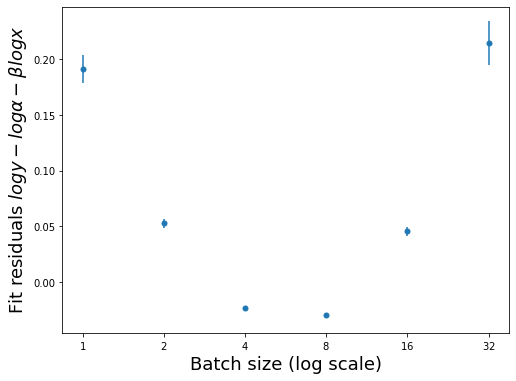

In [60]:
plt.figure(figsize=(8,6))
plt.errorbar(x, residuals, sigma_r, fmt='.', markersize=10)
plt.xlabel('Batch size (log scale)', fontsize=18)
plt.ylabel(r'Fit residuals $logy-log \alpha - {\beta}logx$', fontsize=18)
plt.xticks(x, labels=[r'$%s$'%b for b in batch_sizes])
plt.show()

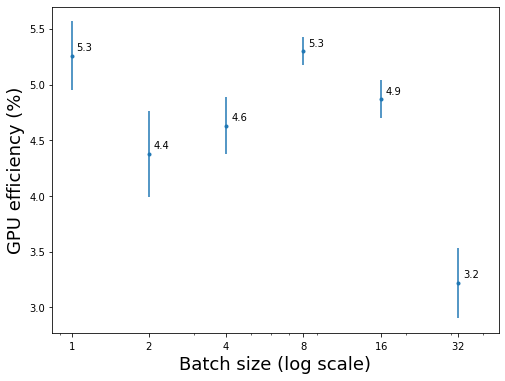

In [61]:
batch_sizes = np.array([2**n for n in range(6)])
GPU_mean_effs = GPU_effs.mean(axis=1)
GPU_std_effs = GPU_effs.std(axis=1)
plt.figure(figsize=(8,6))
plt.errorbar(batch_sizes, GPU_mean_effs, GPU_std_effs, fmt='.')
plt.xlabel('Batch size (log scale)', fontsize=18)
plt.ylabel('GPU efficiency (%)', fontsize=18)
plt.xscale('log')
#plt.yscale('log')
plt.xlim(xmax=46)
plt.xticks(batch_sizes, labels=[r'$%s$'%b for b in batch_sizes])
for i,j in zip(batch_sizes,GPU_mean_effs):
    plt.annotate("%.1f"%j, xy=(i,j), xytext=(5,5), textcoords='offset points')
#plt.legend(fontsize=13)
plt.show()